# Data Analysis with Pandas — Day 2 Workbook Solutions
## Word Counts

This is the Day 2 practice workbook solutions for the June 2021 course "Data Analysis with Pandas," part of the [Text Analysis Pedagogy Institute](https://nkelber.github.io/tapi2021/book/intro.html).

## Dataset

### HathiTrust Extracted Features

The [HathiTrust Digital Library](https://www.hathitrust.org/) has released word frequencies per page for all 17 million books in its catalog. These word frequencies — plus part of speech tags and other information — are known as "extracted features." 

The HTRC team has developed a Python package, the [HathiTrust Feature Reader](https://github.com/htrc/htrc-feature-reader), which allows you to access and work with the extracted features of books.

Guess what: the HathiTrust Feature Reader relies heavily on Pandas! So we're going to practice our Pandas knowledge by applying the concepts to a new form of textual data. We're specifically going to examine Sandra Cisneros's coming-of-age novel *The House on Mango Street*.

## Install HathiTrust Feature Reader

To work with HathiTrust's extracted features, we first need to install and import the [HathiTrust Feature Reader](https://github.com/htrc/htrc-feature-reader).

In [ ]:
!pip install htrc-feature-reader

## Import Libraries

In [2]:
from htrc_features import Volume
import pandas as pd
pd.options.display.max_rows = 800

## Make DataFrame of Word Frequencies

To get HathiTrust extracted features for a single volume, we can create a [Volume object](https://github.com/htrc/htrc-feature-reader#volume) with `Volume()` and the unique HathiTrust volume ID, then use the `.tokenlist()` method. 

<div class="admonition note" name="html-admonition" style="background: skyblue; padding: 10px">
<p class="title"><b/>How to Find a HathiTrust Volume ID</b></p>

To locate the the HathiTrust volume ID for *The House on Mango Street*, we can search the HathiTrust catalog for this book and then click on "Limited (search only)," which will take us to the following web page: https://babel.hathitrust.org/cgi/pt?id=uc1.32106012740764.

The HathiTrust Volume ID for *The House on Mango Street* is located after `id=` this URL: `uc1.32106012740764`. 
</div>

In [3]:
Volume('uc1.32106012740764').tokenlist(case=False, drop_section=True).reset_index()

,page,lowercase,pos,count
0,1,-,UNK,3
1,1,-|-|-|-,UNK,1
2,1,_,UNK,1
3,1,|,UNK,1
4,1,|-,UNK,4
...,...,...,...,...
14172,166,ſº,NN,1
14173,167,32106,UNK,1
14174,167,o1274,UNK,1
14175,167,o764,UNK,1


This DataFrame displays each page number, the words/tokens that appear on the page, the part-of-speech, and the number of times that the words/tokens appears on the page. 

In [4]:
mango_df = Volume('uc1.32106012740764').tokenlist(case=False, pos=True, drop_section=True).reset_index()

## Examine 10 Random Rows

In [5]:
mango_df.sample(10)

,page,lowercase,pos,count
7923,98,afternoon,NN,1
8634,104,now,RB,1
9905,117,dusty,JJ,1
5758,76,me,PRP,1
8048,98,we,PRP,10
2098,34,hair,NN,1
10300,121,ought,MD,1
6158,79,went,VBD,2
4144,57,louie,NNP,1
7529,93,day,NN,1


## Filter the DataFrame

Filter the DataFrame `mango_df` to only show words that are nouns or `NN`

In [6]:
pos_filter = mango_df['pos'] == 'NN'
mango_df[pos_filter]

,page,lowercase,pos,count
18,6,poetry,NN,2
26,7,o11,NN,1
34,9,fiouse,NN,1
38,9,o11,NN,1
52,10,0-679-43335-x,NN,1
...,...,...,...,...
14148,166,phone,NN,1
14149,166,pr,NN,1
14169,166,ºrpººl,NN,1
14171,166,ºſſ,NN,1


## Make a New DataFrame

Make a new DataFrame `pos_df` that only includes words that are nouns or `NN`

In [7]:
pos_df = mango_df[mango_df['pos'] == 'NN'].copy()

## Sort Values

Sort the DataFrame `pos_df` by word count from highest to lowest

In [8]:
pos_df.sort_values(by='count', ascending=False)

,page,lowercase,pos,count
1722,30,house,NN,9
2043,33,hair,NN,8
3896,55,car,NN,8
953,21,voice,NN,7
5035,69,face,NN,6
...,...,...,...,...
5355,73,hopscotch,NN,1
5349,73,heel,NN,1
5345,73,girl,NN,1
5337,73,everybody,NN,1


Sort the DataFrame `pos_df` by word count from highest to lowest, then examine first 30 values

In [9]:
pos_df.sort_values(by='count', ascending=False)[:30]

,page,lowercase,pos,count
1722,30,house,NN,9
2043,33,hair,NN,8
3896,55,car,NN,8
953,21,voice,NN,7
5035,69,face,NN,6
7811,97,day,NN,6
12582,145,kiss,NN,5
3690,53,family,NN,5
4920,68,cumulus,NN,5
7497,92,time,NN,5


## Groupby Word

<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

What are the most frequent nouns in *The House on Mango Street* overall?

</div>

To find out, group by the word column "lowercase", then sum all the word counts per page. Finally, sort values from highest to lowest.

In [10]:
pos_df.groupby('lowercase')['count'].sum().sort_values(ascending=False)

lowercase
house       67
day         60
time        41
home        36
mother      35
            ..
identity     1
ignition     1
iileans      1
imal         1
ſº           1
Name: count, Length: 883, dtype: uint32

Now examine just the top 30 nouns overall

In [11]:
pos_df.groupby('lowercase')['count'].sum().sort_values(ascending=False)[:30]

lowercase
house        67
day          60
time         41
home         36
mother       35
mama         30
way          28
man          28
name         26
school       25
baby         24
somebody     23
one          22
papa         22
something    20
family       20
door         19
car          19
voice        18
story        17
cousin       17
hair         17
book         17
girl         17
water        17
window       17
nobody       16
face         16
garden       15
everybody    15
Name: count, dtype: uint32

## Make a Plot of Top Words

Save the top 15 nouns as a new variable `top15_df`

In [14]:
top15_df = pos_df.groupby('lowercase')['count'].sum().sort_values(ascending=False)[:15]

Then plot a bar chart of this smaller DataFrame `top15_df`

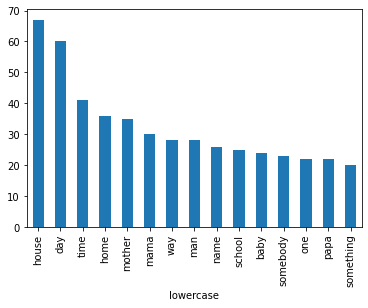

In [15]:
top15_df.plot(kind='bar')

## Bonus: Chart Word(s) Frequency Across the Volume

We can plot word frequency across the book by filtering by word. Try it out with other words!

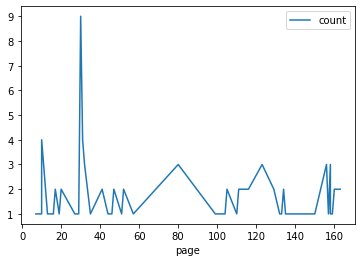

In [16]:
# Boolean vector
word_filter = mango_df['lowercase'] == 'house'
# Filter, then plot
mango_df[word_filter].plot(x='page', y='count')

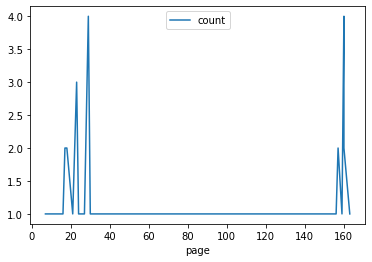

In [17]:
# Boolean vector
word_filter = mango_df['lowercase'].isin(['mango', 'street'])
# Filter, then plot
mango_df[word_filter].plot(x='page', y='count')